In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

mcmc = pickle.load(open('../model/SLR_basic.pkl','rb'))
params={'beta0':-10, 'beta1':5, 'mu_x':0.5, 's2_x':1/36, 's2_ep':10, 's2_v':1/36, 's2_d':1/100}
heights = {'beta0':0.5, 'beta1':14,'s2_ep':0.5}
# heights={'beta0':8, 'beta1':10, 'mu_x':10, 's2_x':3, 's2_ep':1, 's2_v':3, 's2_d':3}

beta0 = mcmc.act_params['beta0']
beta1 = mcmc.act_params['beta1']

s2_ep = mcmc.act_params['s2_ep']

n = 120
np.random.seed(1)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
x = np.random.uniform(10, 40, 120)
y = beta0 + beta1*x + ep

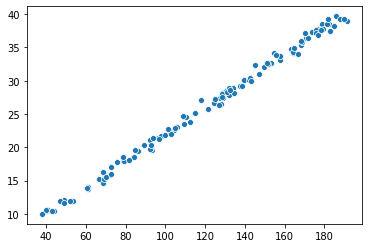

In [2]:
sns.scatterplot(y,x)
plt.show()

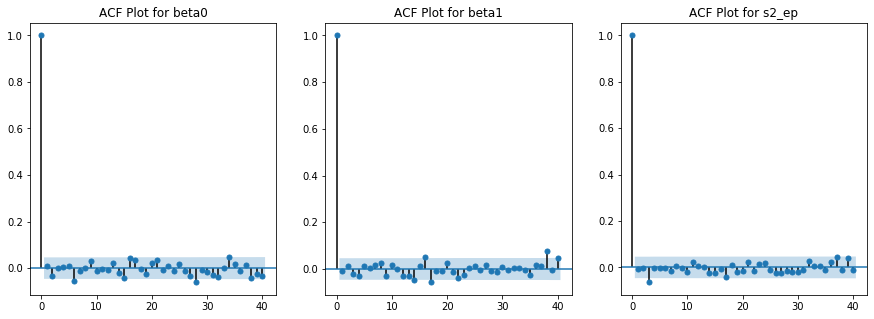

In [3]:
burnin = 1000
thinning = 5

fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):

    key = list(mcmc.params.keys())[a]
    plot_acf(np.array(mcmc.params[key])[burnin::thinning], lags=40, ax=ax[i])
    ax[i].set_title(f'ACF Plot for {key}')
            
    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.12/autocorr.png')
plt.show()

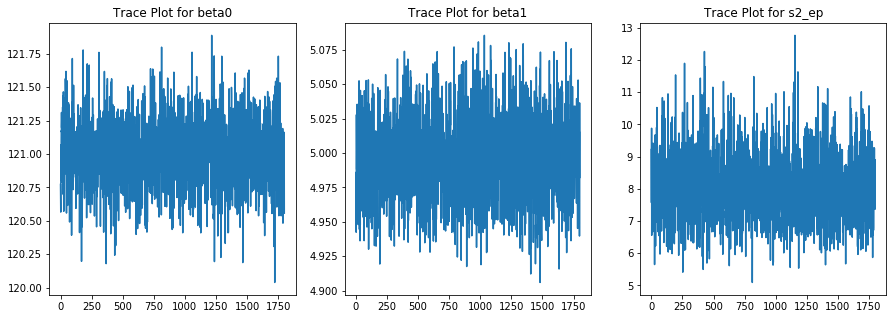

In [4]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):
    key = list(mcmc.params.keys())[a]
    ax[i].plot(mcmc.params[key][burnin::thinning])
    ax[i].set_title(f'Trace Plot for {key}')
    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.12/traceplot.png')
plt.show()

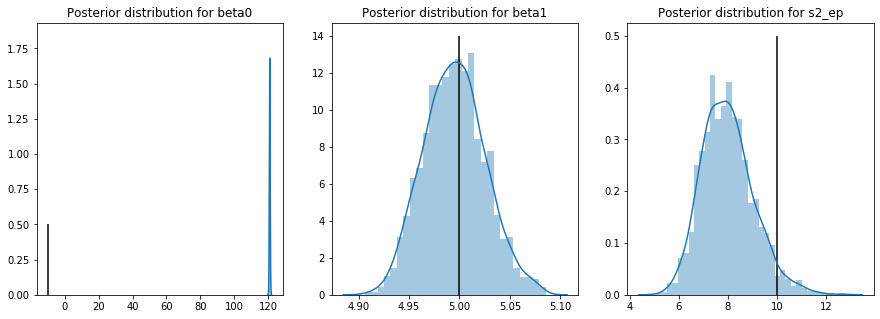

In [5]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):
    key = list(mcmc.params.keys())[a]
    sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i], norm_hist=True)
    ax[i].vlines(params[key] ,0, heights[key])
    ax[i].set_title(f'Posterior distribution for {key}')

    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.12/density_50.png')
plt.show()

In [60]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

In [61]:
print('====================== 95% credible interval for each parameter ======================')
params_name = mcmc.params.keys()
for n in params_name:
    
    if n == 'x':
        for i in range(3):
            lower, upper = credible_interval(mcmc.params[n][i,:][burnin::thinning], 0.05)
            print(f'{n}[{i}]:  {lower},  {upper}')
    else:
        lower, upper = credible_interval(mcmc.params[n][burnin::thinning], 0.05)
        print(f'{n}:  {lower},  {upper}')

====================== 95% credible interval for each parameter ======================
beta0:  -11.289,  -8.126
beta1:  4.937,  5.051
s2_ep:  6.147,  10.371
